In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_score

In [14]:
path = "glass.csv"
glass = pd.read_csv(path)

In [15]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [17]:
X = glass.iloc[:, :-1]  # All rows, all columns except the last one (features)
y = glass.iloc[:, -1] 

Jaccard Score for k=2: 0.0874


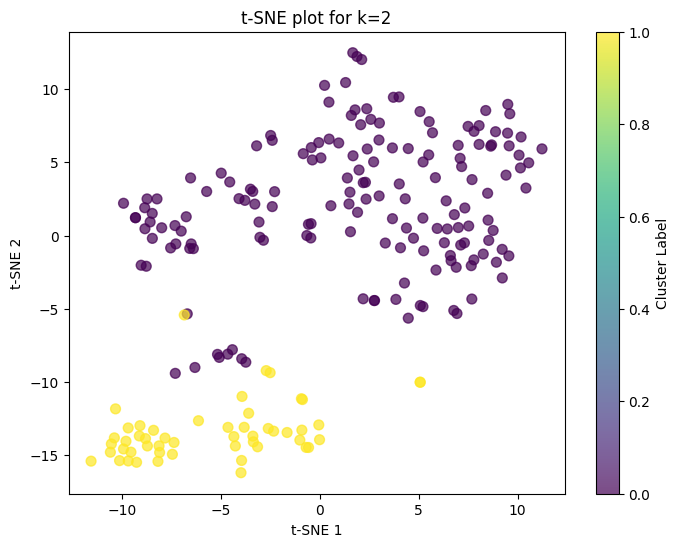

Jaccard Score for k=3: 0.0791


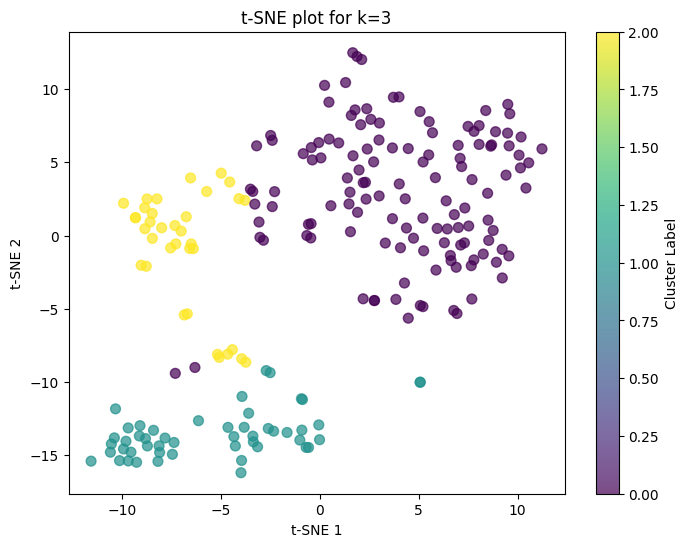

Jaccard Score for k=4: 0.1192


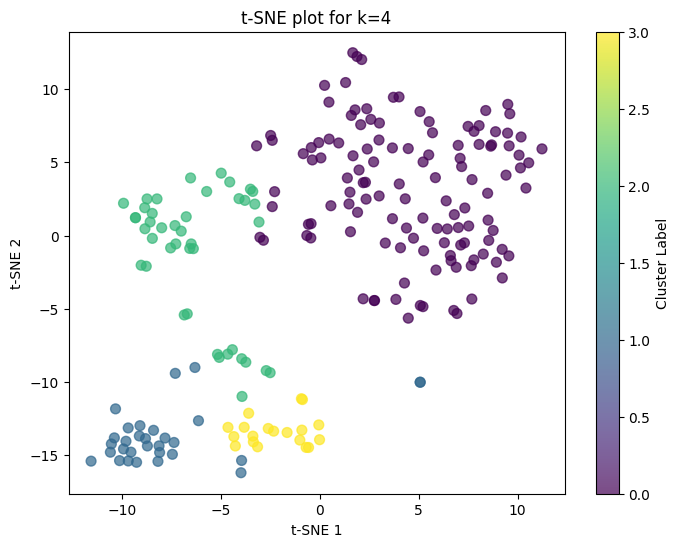

Jaccard Score for k=5: 0.0738


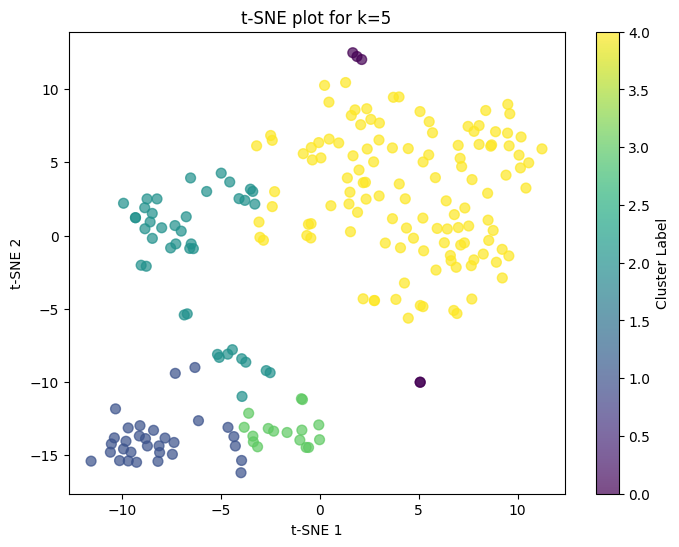

Jaccard Score for k=6: 0.0969


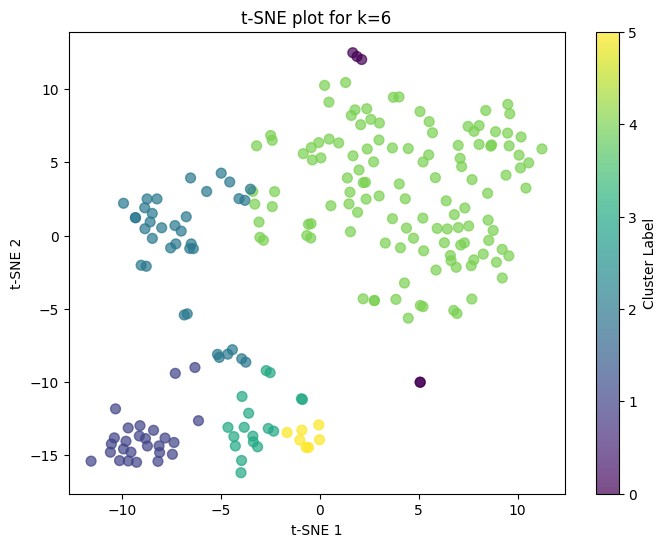

In [22]:

# Step 4: Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Define the range of k values
k_values = [2, 3, 4, 5, 6]  # Change these values as per your requirement

# Step 4: Run KMeans for each k and plot the t-SNE
for k in k_values:
    # Run KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    try:
        jaccard = jaccard_score(y_encoded, labels, average='macro')
        print(f'Jaccard Score for k={k}: {jaccard:.4f}')
    except ValueError as e:
        print(f"Jaccard score calculation failed for k={k} due to: {e}")
    
    # Reduce dimensions using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)
    
    # Plot t-SNE with cluster labels
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(f't-SNE plot for k={k}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.colorbar(label='Cluster Label')
    plt.show()


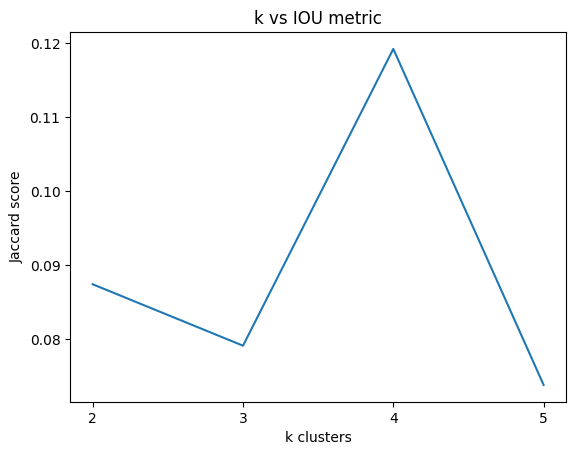

In [31]:
scores = [0.0874,
0.0791,
0.1192,
0.0738]

k_values = [2,3,4,5]
labels = ["2","3","4", "5"]


plt.plot(k_values, scores)
plt.xticks(k_values, labels)
plt.title("k vs IOU metric")
plt.xlabel("k clusters")
plt.ylabel("Jaccard score")
plt.show()